In [1]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
%matplotlib inline
import random
import math

pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\gray_four_directions\gray_four_directions_data.hdf5")
df.reset_index(inplace = True)
print('done all data')

done all data


In [26]:
df 'start_tail_tip_deflection'

,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,estimated_orientation_change_flipped,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,binned_time
0,0,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,-8.439222,13.056763,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,13.5
1,1,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,-6.241561,15.868256,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,15.5
2,2,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,0.057477,16.899708,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.5
3,3,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,16.345433,17.774014,1.0,0.0,0.0,1.0,1.0,1.0,0.0,17.5
4,4,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_rightward,0,...,-12.170412,15.000067,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,14806,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,0.930875,44.878753,0.0,0.0,1.0,0.0,1.0,1.0,0.0,44.5
14807,14807,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,-0.771077,45.624484,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,45.5
14808,14808,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,10.028995,47.561671,1.0,0.0,0.0,1.0,1.0,1.0,0.0,47.5
14809,14809,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,gray,181,...,-9.819926,47.847504,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,47.5


In [12]:
df["stimulus_name"].unique().tolist()

['motion_leftward',
 'motion_rightward',
 'motion_forward',
 'motion_backward',
 'gray']

Text(0.5, 1.0, 'embedded fish 24 hour data, histogram of estimated orientation change')

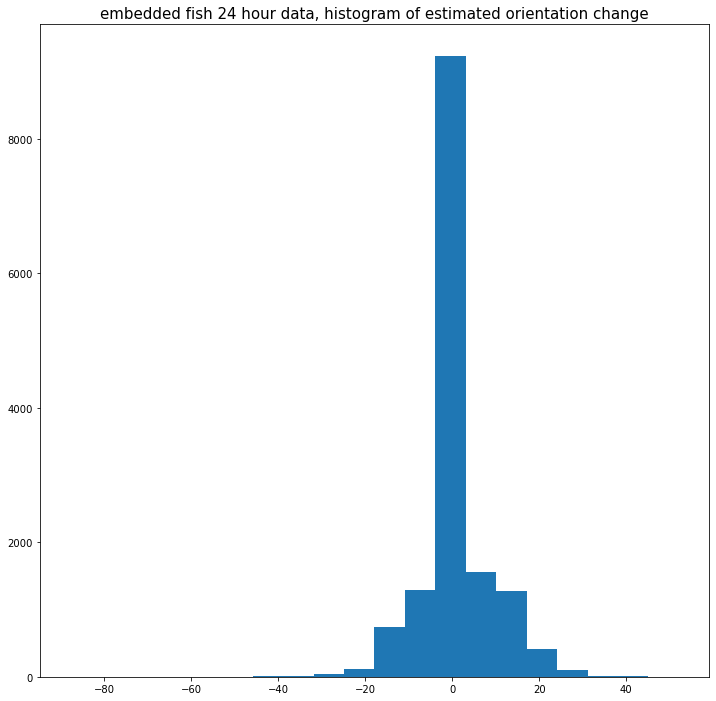

In [40]:
plt.hist(df['estimated_orientation_change'],bins = 20)
plt.title('embedded fish 24 hour data, histogram of estimated orientation change',size = 15)


In [24]:
df_cols = df.columns.tolist()
df_cols

['index',
 'setup_index',
 'arena_index',
 'experiment_repeat',
 'fish_ID',
 'folder_name',
 'fish_genotype',
 'fish_age',
 'stimulus_name',
 'trial',
 'start_time',
 'start_tail_tip_deflection',
 'end_time',
 'end_tail_tip_deflection',
 'duration',
 'estimated_orientation_change',
 'interbout_interval',
 'same_direction_as_previous_bout',
 'start_time_absolute',
 'end_time_absolute',
 'estimated_orientation_change_flipped',
 'time',
 'left_bouts',
 'right_bouts',
 'straight_bouts',
 'bout_orientation',
 'bout_orientation_absolute',
 'left_bouts_absolute',
 'right_bouts_absolute',
 'binned_time']

In [42]:
len(df)/(4*24*60) # a fish did 2.5 tail flips per minute on average

2.5713541666666666

In [27]:
print(len(df))
df2=df.dropna(axis=0)
print(len(df2))


14811
14808


,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,estimated_orientation_change_flipped,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,binned_time
1,1,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,-6.241561,15.868256,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,15.5
2,2,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,0.057477,16.899708,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.5
3,3,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,16.345433,17.774014,1.0,0.0,0.0,1.0,1.0,1.0,0.0,17.5
4,4,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_rightward,0,...,-12.170412,15.000067,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,15.5
5,5,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_rightward,0,...,-23.035729,16.368670,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,14806,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,0.930875,44.878753,0.0,0.0,1.0,0.0,1.0,1.0,0.0,44.5
14807,14807,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,-0.771077,45.624484,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,45.5
14808,14808,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,10.028995,47.561671,1.0,0.0,0.0,1.0,1.0,1.0,0.0,47.5
14809,14809,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,gray,181,...,-9.819926,47.847504,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,47.5


In [28]:
def bin_data(label_df, bin_size = 1): # why did i add name_of_data here???
    time_index = label_df['time']
    label_df['binned_time'] = time_index - time_index % bin_size + bin_size / 2
    label_df = label_df.reset_index()
    bin_df = label_df.groupby(['fish_ID', 'stimulus_name', 'binned_time']).sum()
    bin_df['total_bouts'] = bin_df.left_bouts + bin_df.right_bouts + bin_df.straight_bouts
    #Analysed part:
    bin_df['preference_index'] = (bin_df.left_bouts - (bin_df.right_bouts + bin_df.straight_bouts))/bin_df.total_bouts
    bin_df['percentage_left'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df['percentage_right'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df['percentage_straight'] = (bin_df.left_bouts / bin_df.total_bouts)*100
   # bin_df['left_bouts_absolute'] = (bin_df.left_bouts_absolute / bin_df.total_bouts)*100
   # bin_df['right_bouts_absolute'] = (bin_df.right_bouts_absolute / bin_df.total_bouts)*100
   # bin_df.to_csv(r"C:\Users\ag-bahl\Desktop\dataframes\binned_df"+str(name_of_data)+".csv")
    return bin_df
bin_df = bin_data(df, bin_size = 1)

In [36]:
def plot_pref(bin_df, pref='preference_index', time_marker=None,plot_together = True):
    num_fish = len(bin_df.index.unique('fish_ID'))
    t_stamp = bin_df.index.unique('binned_time')
    bin_df = bin_df.reset_index()

    mean_df = bin_df.groupby(['stimulus_name', 'binned_time']).mean()
    sem_df = bin_df.groupby(['stimulus_name', 'binned_time']).std() / (num_fish) ** 0.5
    if plot_together == True:
        legend = []
    colors = ['red','purple','cyan','green','orange','blue','pink','brown','violet','red','cyan']
 #   for variable in
    iterate = mean_df.index.unique('stimulus_name')
    for stim in range(len(iterate)):
        if plot_together == True:
            legend.append(str(iterate[stim]))
        else:
            legend = [str(iterate[stim])]
        plot_mean_df = mean_df.xs(iterate[stim], level='stimulus_name')
        plot_sem_df = sem_df.xs(iterate[stim], level='stimulus_name')

        plt.plot(plot_mean_df.preference_index, marker='o', linewidth=1, markersize=2,color = colors[stim])
      #  plt.fill_between(t_stamp, plot_mean_df.preference_index + plot_sem_df.preference_index,
       #                  plot_mean_df.preference_index - plot_sem_df.preference_index,
        #                 alpha=0.25, label='_no_legend_',color = colors[stim])


     #   plt.legend(legend)
     #   plt.show()
    if time_marker != None:
        for t in time_marker:
            plt.axvline(x=t, color='grey', linestyle='--', alpha=0.4, label='_nolegend_')
    plt.plot([0,0],[-1,1], color = 'blue')
    plt.legend(legend)
    plt.title('Sine gratings 8 directions',size = 20)
    plt.xlabel('Time (seconds)', size = 20)
    plt.ylabel('Orientation', size = 20)
    plt.show()

    return plt


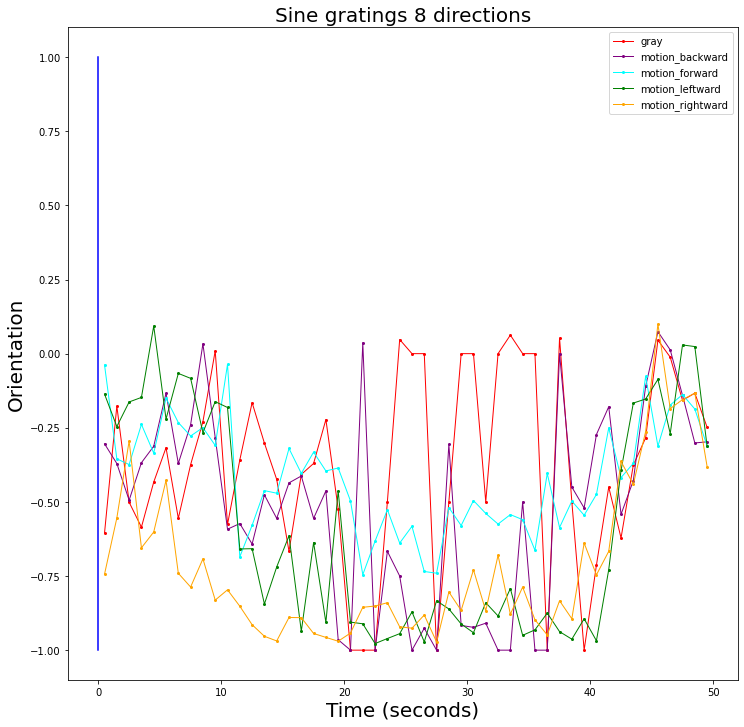

<module 'matplotlib.pyplot' from 'C:\\Users\\ag-bahl\\anaconda3\\envs\\py39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [37]:
plt.rcParams["figure.figsize"] = (12,12)

plot_pref(bin_df, pref='preference_index', time_marker=None,plot_together = True)